In [2]:
import numpy as np
import pandas as pd
import chardet

In [3]:
df = pd.read_csv('spam.csv', encoding = 'Windows-1252')
# with open('spam.csv', 'rb') as file:
    # print(chardet.detect(file.read()))

In [4]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4620,ham,"Received, understood n acted upon!",NaN,NaN,NaN
3756,spam,YES! The only place in town to meet exciting a...,NaN,NaN,NaN
235,ham,I have printed it oh. So &lt;#&gt; come upst...,NaN,NaN,NaN
431,ham,Does she usually take fifteen fucking minutes ...,NaN,NaN,NaN
1379,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...,NaN,NaN,NaN
5404,ham,Pls give her prometazine syrup. 5mls then &lt...,NaN,NaN,NaN
1786,ham,Do you know why god created gap between your f...,NaN,NaN,NaN
739,ham,Haha mayb u're rite... U know me well. Da feel...,NaN,NaN,NaN
5018,ham,Great! How is the office today?,NaN,NaN,NaN
1350,ham,Bugis oso near wat...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
df.sample(10)

,v1,v2
1469,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...
3937,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
5105,ham,I wnt to buy a BMW car urgently..its vry urgen...
5192,ham,Oh oh... Den muz change plan liao... Go back h...
3984,ham,"Whatever, juliana. Do whatever you want."
477,ham,Tension ah?what machi?any problem?
5248,ham,U come n search tat vid..not finishd..
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny
2333,ham,What happen to her tell the truth
5373,ham,"K I'll head out in a few mins, see you there"


In [8]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep = 'first', inplace=True)
df.shape

(5169, 2)

In [14]:
df.duplicated().sum()

0

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

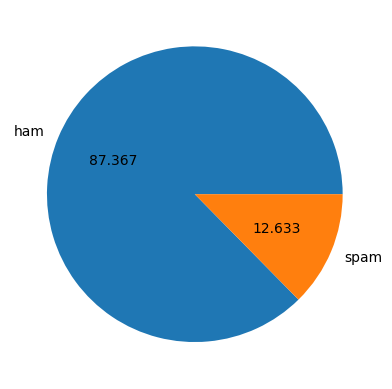

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.3f')
plt.show()

In [17]:
!pip install nltk

In [18]:
import nltk # natural language toolkit

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ANAS
[nltk_data]     IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# number of characters in text
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# number of words in text
df['num_words'] = df['text'].apply(lambda n: len(nltk.word_tokenize(n)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# number of sentences in text
df['num_sentences'] = df['text'].apply(lambda n: len(nltk.sent_tokenize(n)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
# ham
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [28]:
# spam
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

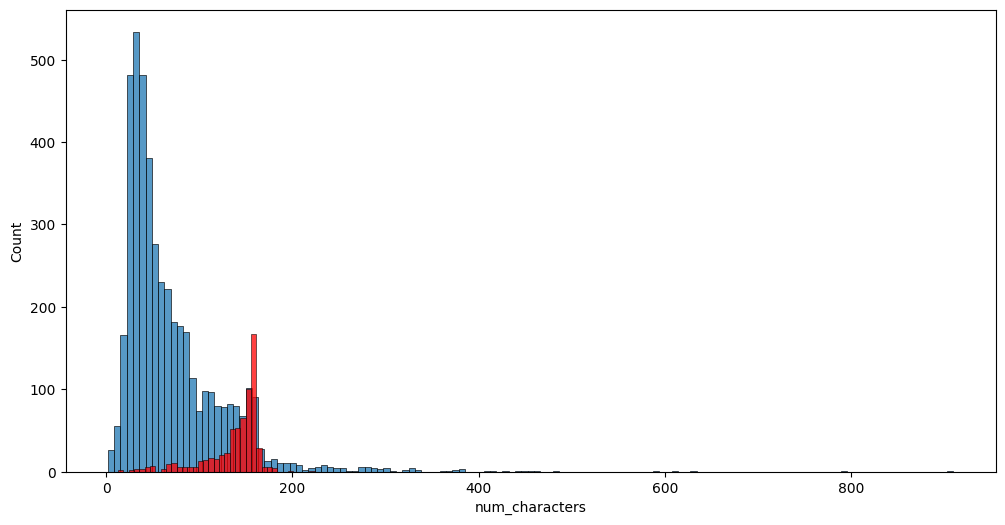

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

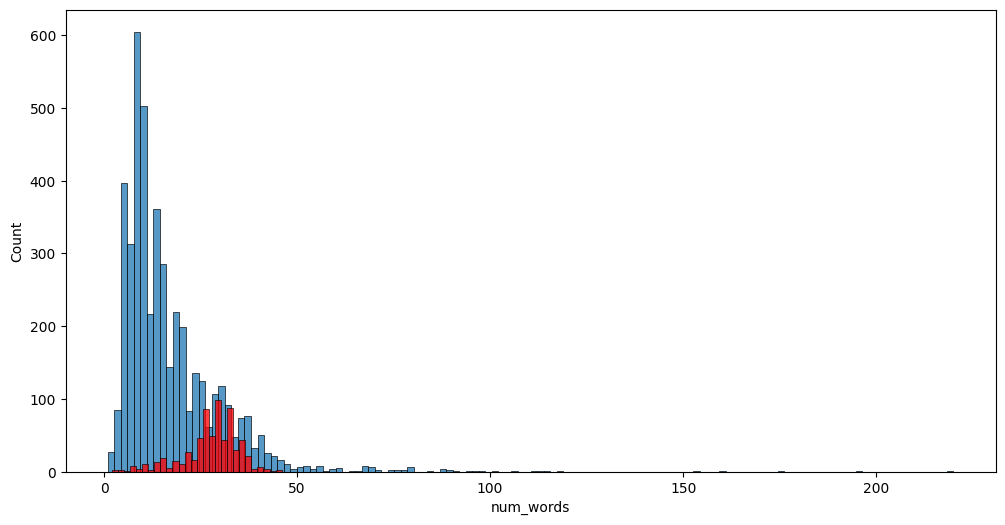

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

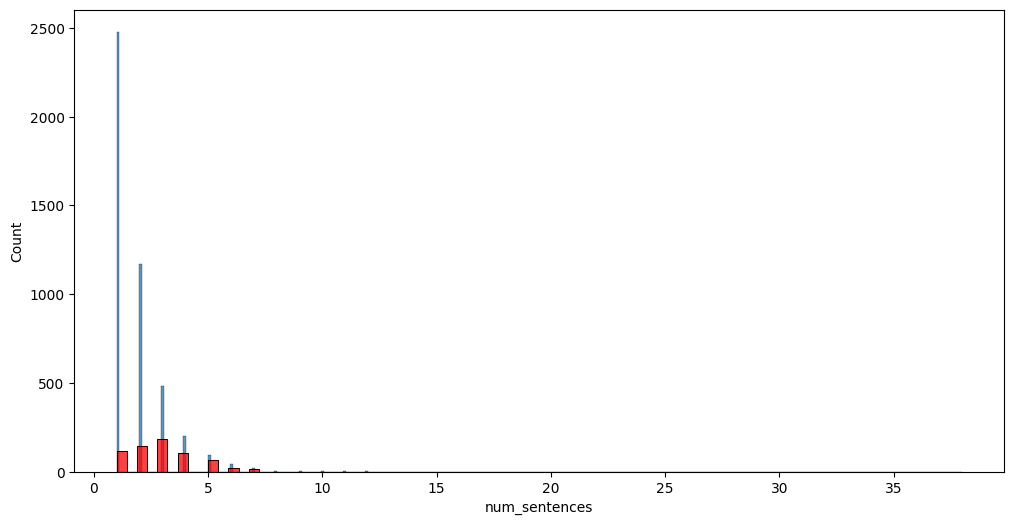

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')

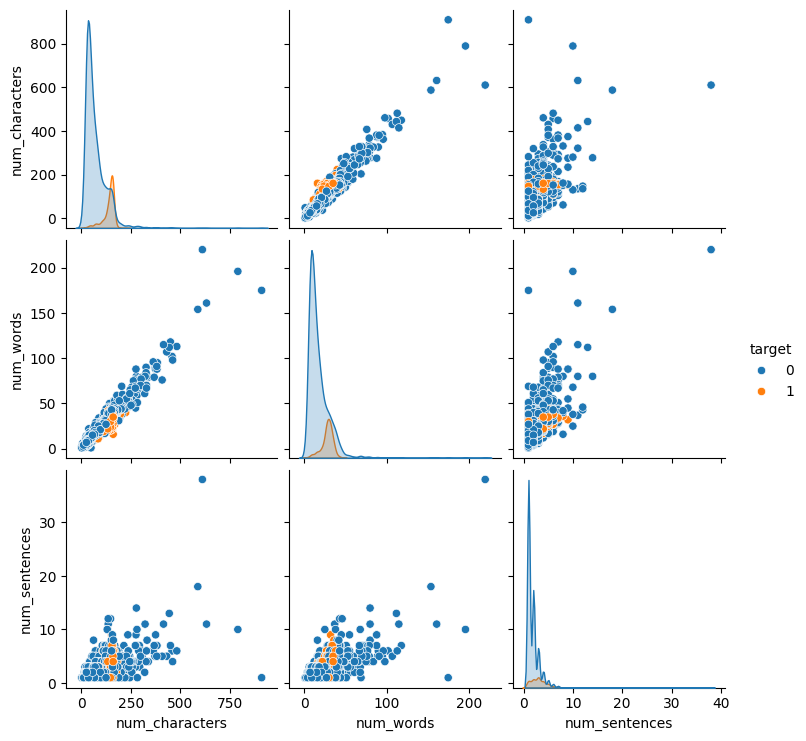

In [33]:
sns.pairplot(df, hue = 'target')

In [34]:
df[['target', 'num_characters',	'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

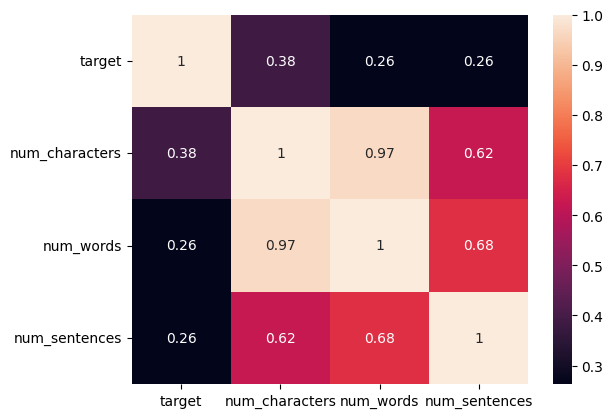

In [35]:
sns.heatmap(df[['target', 'num_characters',	'num_words', 'num_sentences']].corr(), annot = True)

In [36]:
# High Multicollinearity in data 
# so we need to choose only one of the columns (whose collinearity with target column is highest)

In [37]:
import nltk
import re

In [38]:
import string

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [41]:
from nltk.corpus import stopwords
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

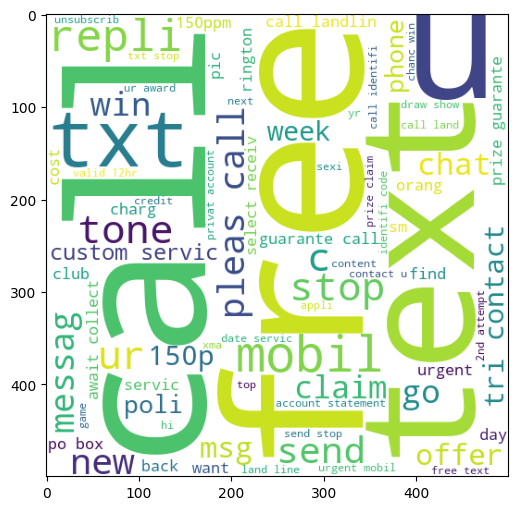

In [45]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [46]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

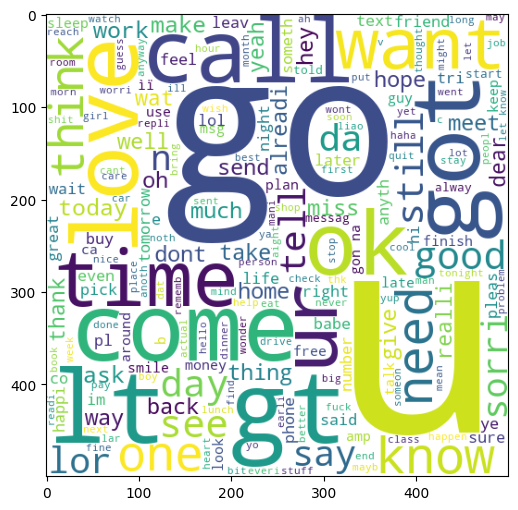

In [47]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [48]:
# Extracting top 30 words occured in spam and ham

In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

In [51]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


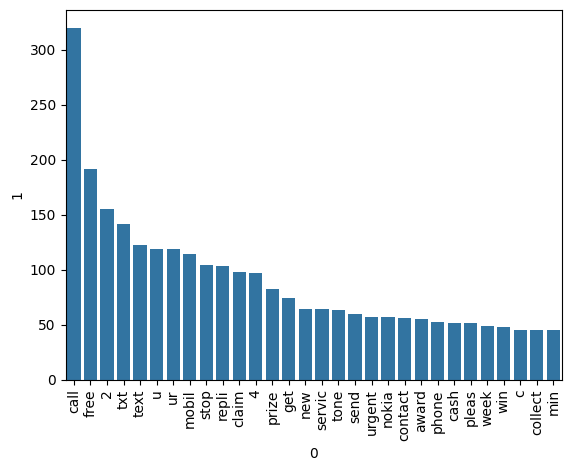

In [52]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


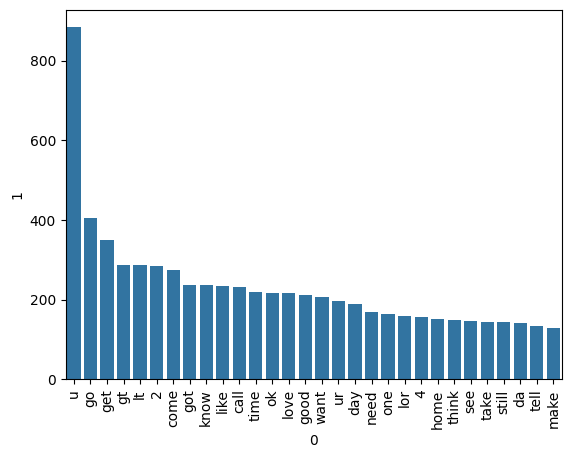

In [55]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model

In [58]:
# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [59]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [61]:
# Adding num_character as new feature to X to compare results
# X = np.hstack((X, df['num_charcters'].values.reshape(-1, 1)))

In [62]:
X.shape

(5169, 3000)

In [63]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
y = df['target'].values


In [65]:
y.shape

(5169,)

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [72]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [74]:
# MultinomialNB with TfidfVectorizer is giving best results

In [75]:
# Now trying out different algorithms

In [76]:
# !pip install xgboost

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [79]:
clfs = {
    'LogisticRegression' : lrc,
    'SVC' : svc,
    'MultinomialNB' : mnb,
    'DecisionTreeClassifier' : dtc,
    'KNeighborsClassifier' : knc,
    'RandomForestClassifier' : rfc,
    'AdaBoostClassifier' : abc,
    'BaggingClassifier' : bc,
    'ExtraTreesClassifier' : etc,
    'GradientBoostingClassifier' : gbdt,
    'XGBClassifier' : xgb
}

In [80]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [81]:
accuracy_col = []
precision_col = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For Algorithm: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_col.append(current_accuracy)
    precision_col.append(current_precision)

For Algorithm:  LogisticRegression
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For Algorithm:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For Algorithm:  MultinomialNB
Accuracy:  0.9709864603481625
Precision:  1.0
For Algorithm:  DecisionTreeClassifier
Accuracy:  0.9274661508704062
Precision:  0.8118811881188119
For Algorithm:  KNeighborsClassifier
Accuracy:  0.9052224371373307
Precision:  1.0
For Algorithm:  RandomForestClassifier
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829


C:\Users\ANAS IQBAL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For Algorithm:  AdaBoostClassifier
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For Algorithm:  BaggingClassifier
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For Algorithm:  ExtraTreesClassifier
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For Algorithm:  GradientBoostingClassifier
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For Algorithm:  XGBClassifier
Accuracy:  0.9671179883945842
Precision:  0.9262295081967213


In [82]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_col, 'Precision' : precision_col}).sort_values('Precision', ascending = False)

In [83]:
performance_df

,Algorithm,Accuracy,Precision
2,MultinomialNB,0.970986,1.000000
4,KNeighborsClassifier,0.905222,1.000000
5,RandomForestClassifier,0.975822,0.982906
1,SVC,0.975822,0.974790
8,ExtraTreesClassifier,0.974855,0.974576
0,LogisticRegression,0.958414,0.970297
6,AdaBoostClassifier,0.960348,0.929204
10,XGBClassifier,0.967118,0.926230
9,GradientBoostingClassifier,0.946809,0.919192
7,BaggingClassifier,0.958414,0.868217


In [84]:
# performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [85]:
# sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
# plt.ylim(0.8, 1.0)
# plt.xticks(rotation = 'vertical')
# plt.show()

In [86]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_max_f_3000' : accuracy_col, 'Precision_max_f_3000' : precision_col}).sort_values('Precision_max_f_3000', ascending = False)

In [87]:
performance_df.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_f_3000,Precision_max_f_3000
0,MultinomialNB,0.970986,1.000000,0.970986,1.000000
1,KNeighborsClassifier,0.905222,1.000000,0.905222,1.000000
2,RandomForestClassifier,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ExtraTreesClassifier,0.974855,0.974576,0.974855,0.974576
5,LogisticRegression,0.958414,0.970297,0.958414,0.970297
6,AdaBoostClassifier,0.960348,0.929204,0.960348,0.929204
7,XGBClassifier,0.967118,0.926230,0.967118,0.926230
8,GradientBoostingClassifier,0.946809,0.919192,0.946809,0.919192
9,BaggingClassifier,0.958414,0.868217,0.958414,0.868217


In [88]:
# new_df_scaled = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_scaled' : accuracy_col, 'Precision_scaled' : precision_col}).sort_values('Precision', ascending = False)

In [89]:
# performance_df.merge(new_df_scaled, on = 'Algorithm')

In [90]:
# num_char_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_num_chars' : accuracy_col, 'Precision_num_chars' : precision_col}).sort_values('Precision', ascending = False)

In [91]:
# performance_df.merge(num_char_df, on = 'Algorithm')

In [92]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [93]:
# voting = VotingClassifier(estimators = [('SVM', svc), ('MultinomialNB', mnb), ('ExtraTreesClassifier', etc)], voting = 'soft')
voting = VotingClassifier(estimators = [('SVC', svc), ('MultinomialNB', mnb), ('ExtraTreesClassifier', etc)], voting = 'hard')

In [94]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('MultinomialNB', MultinomialNB()),
                             ('ExtraTreesClassifier',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [95]:
y_pred = voting.predict(X_test)
print('Voting Classifier Result')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Voting Classifier Result
Accuracy:  0.9787234042553191
Precision:  1.0


In [96]:
# Using Stacking
from sklearn.ensemble import StackingClassifier

estimators = [('MultinomialNB', mnb), ('ExtraTreesClassifier', etc), ('SVC', svc)]
final_estimator = RandomForestClassifier()

In [97]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [ ]:
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [ ]:
print('Stacking Classifier Result')
print('Accuracy: ', accuracy_score(y_test, clf_pred))
print('Precision: ', precision_score(y_test, clf_pred))

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(voting, open('model.pkl', 'wb'))